# Import Libraries

In [1]:
import pandas as pd
# Import Libraries for Graph, GNN, and GCN

import stellargraph as sg
from stellargraph import StellarGraph

from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

In [2]:
# Machine Learnig related library Imports

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# was active

data_folder = './data/yahoonewsarchive/'
# os.chdir(data_folder);
# file = data_folder + 'NEWS_YAHOO_stock_prediction.csv';
file = data_folder + 'News_Yahoo_stock.csv';

In [4]:
df_news = pd.read_csv(file)
df_news.head()

,Unnamed: 0,title,content,label
0,0,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,0
1,1,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,0
2,2,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,0
3,3,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,0
4,4,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,0


In [5]:
df_news = df_news[:100]

# Approaches: Find all stock tickers in an/all article/articles

1. Find code that does this: from internet or from previous work or from courses that you have taken online or in academia
2. Iterative read the article and match with stock tickers, and find all tickers. Drawback: to which tickers to match or how will you know what is a ticker? Any two to four letters Uppercase, NASDAQ AAPL
3. Load the article in database and then use SQL -> may not work that well unless you write some functions
4. NLTK, remove stop words, find all tokens, then find All Uppercase words. create a list. attach article ids to the list. Then match with the list of tockers. find common tickers between them. then create tuples with two (indicating edge) (source target weight) 

In [6]:
# import NLTK libraries
# remove stop words using NLTK methods 
# remove all sorts of unnecessary words
# find all tokens
# Keep only All Uppercase words in a list : dictionary/map: dataframe will be ideal
# create a list/dictionary/map: dataframe will be ideal. attach article ids to the list/dataframe data.
# Create a list of all NasDAQ Tickers
# Then match with the list of NASDAQ tockers. 
# find common tickers between them. 
# then create tuples with two (indicating edge) (source target weight)
# increase weight for each article and pair when you see a match

In [7]:
# import NLTK libraries
import nltk

In [8]:
# remove stop words using NLTK methods 
# remove all sorts of unnecessary words
# find all tokens
# Keep only All Uppercase words in a list : dictionary/map: dataframe will be ideal

from nltk.tokenize import RegexpTokenizer

dataFrameWithOnlyCapitalWords = pd.DataFrame(columns =  ["id", "Title", "Content"]) 
for index, row in df_news.iterrows():
    # print(row[id], row['title'], row['content'])
                
    # words with capital letters in the beginning +  as much as possible
    capitalWords = RegexpTokenizer('[A-Z]+[A-Z]\w+')
    # print("\n::All Capital Words::", capitalWords.tokenize(row['content']))
    allCapitalWords = capitalWords.tokenize(row['content'])
        
    dataFrameWithOnlyCapitalWords.loc[index] = [index, row['title'], allCapitalWords]
    #break



dataFrameWithOnlyCapitalWords.head() #, dataFrameWithOnlyCapitalWords.shape


,id,Title,Content
0,0,Apple Set To Beat Q1 Earnings Estimates Tech ...,"[NASDAQ, AAPL, ESP, EPS, AAPL, ETFs, ETFs, ETF..."
1,1,Tech Daily Intel Results Netflix Surge Appl...,"[NYSE, NASDAQ, NFLX, NASDAQ, AAPL, NASDAQ, GOO..."
2,2,7 Monster Stock Market Predictions For The Wee...,"[SPY, AAPL, NASDAQ, AAPL, RSI, RSI, AMD, AMD, ..."
3,3,Apple Earnings Preview 5G Launch Expanding S...,"[EPS, NASDAQ, AAPL, CNBC]"
4,4,Buy Surging Apple Microsoft Stock Before Qua...,"[NASDAQ, AAPL, NASDAQ, MSFT, NASDAQ, AMZN, NAS..."


# Create a list of all (NasDAQ) 30 stocks as per the paper


In [9]:
# Find/Create a list of NASDAQ Stocks
import os
import glob
nasdaqDataFolder = './archive/stock_market_data/nasdaq/csv'
os.chdir(nasdaqDataFolder)





In [10]:
# Create a list of all NasDAQ Tickers

extension = "csv"
fileTypesToMerge = ""
# all_filenames = [i for i in glob.glob('*' + '*.{}'.format(extension))]
all_nasdaq_tickers = [i[:-4] for i in glob.glob('*' + fileTypesToMerge + '*.{}'.format(extension))]
nasdaq_tickers_to_process = all_nasdaq_tickers #[:10]
nasdaq_tickers_to_process

['AAL',
 'AAME',
 'AAOI',
 'AAON',
 'AAPL',
 'AAVL',
 'AAWW',
 'ABCB',
 'ABCD',
 'ABCO',
 'ABIO',
 'ABMD',
 'ACAD',
 'ACET',
 'ACFC',
 'ACFN',
 'ACGL',
 'ACHC',
 'ACHN',
 'ACIW',
 'ACLS',
 'ACNB',
 'ACOR',
 'ACRX',
 'ACST',
 'ACTA',
 'ACTG',
 'ACUR',
 'ADBE',
 'ADES',
 'ADI',
 'ADMA',
 'ADMP',
 'ADP',
 'ADSK',
 'ADTN',
 'ADUS',
 'ADXS',
 'AEHR',
 'AEIS',
 'AELTF',
 'AERI',
 'AEY',
 'AEZS',
 'AFAM',
 'AFCB',
 'AFMD',
 'AFSI',
 'AGEN',
 'AGIO',
 'AGRX',
 'AGTC',
 'AGYS',
 'AHGP',
 'AHPI',
 'AIMC',
 'AIQ',
 'AIRT',
 'AJISF',
 'AKAM',
 'AKBA',
 'ALCO',
 'ALDX',
 'ALGN',
 'ALGT',
 'ALIM',
 'ALKS',
 'ALLT',
 'ALNY',
 'ALOG',
 'ALSD',
 'AMAT',
 'AMBA',
 'AMBC',
 'AMCF',
 'AMCX',
 'AMD',
 'AMED',
 'AMGN',
 'AMKR',
 'AMNB',
 'AMOT',
 'AMPH',
 'AMRN',
 'AMRS',
 'AMSC',
 'AMSWA',
 'AMTX',
 'AMWD',
 'AMX',
 'AMZN',
 'ANAC',
 'ANCB',
 'ANCX',
 'ANDE',
 'ANGI',
 'ANGO',
 'ANIK',
 'ANIP',
 'ANTH',
 'ANY',
 'AOSL',
 'APDN',
 'APEI',
 'APOG',
 'APTO',
 'APWC',
 'ARAY',
 'ARCB',
 'ARCC',
 'ARCK',
 'ARCW

In [11]:
nasdaq_tickers_to_process.remove('FREE')
nasdaq_tickers_to_process.remove('CBOE')
nasdaq_tickers_to_process.remove('III')
nasdaq_tickers_to_process.remove('RVNC')
sorted(nasdaq_tickers_to_process)

['AAL',
 'AAME',
 'AAOI',
 'AAON',
 'AAPL',
 'AAVL',
 'AAWW',
 'ABCB',
 'ABCD',
 'ABCO',
 'ABIO',
 'ABMD',
 'ACAD',
 'ACET',
 'ACFC',
 'ACFN',
 'ACGL',
 'ACHC',
 'ACHN',
 'ACIW',
 'ACLS',
 'ACNB',
 'ACOR',
 'ACRX',
 'ACST',
 'ACTA',
 'ACTG',
 'ACUR',
 'ADBE',
 'ADES',
 'ADI',
 'ADMA',
 'ADMP',
 'ADP',
 'ADSK',
 'ADTN',
 'ADUS',
 'ADXS',
 'AEHR',
 'AEIS',
 'AELTF',
 'AERI',
 'AEY',
 'AEZS',
 'AFAM',
 'AFCB',
 'AFMD',
 'AFSI',
 'AGEN',
 'AGIO',
 'AGRX',
 'AGTC',
 'AGYS',
 'AHGP',
 'AHPI',
 'AIMC',
 'AIQ',
 'AIRT',
 'AJISF',
 'AKAM',
 'AKBA',
 'ALCO',
 'ALDX',
 'ALGN',
 'ALGT',
 'ALIM',
 'ALKS',
 'ALLT',
 'ALNY',
 'ALOG',
 'ALSD',
 'AMAT',
 'AMBA',
 'AMBC',
 'AMCF',
 'AMCX',
 'AMD',
 'AMED',
 'AMGN',
 'AMKR',
 'AMNB',
 'AMOT',
 'AMPH',
 'AMRN',
 'AMRS',
 'AMSC',
 'AMSWA',
 'AMTX',
 'AMWD',
 'AMX',
 'AMZN',
 'ANAC',
 'ANCB',
 'ANCX',
 'ANDE',
 'ANGI',
 'ANGO',
 'ANIK',
 'ANIP',
 'ANTH',
 'ANY',
 'AOSL',
 'APDN',
 'APEI',
 'APOG',
 'APTO',
 'APWC',
 'ARAY',
 'ARCB',
 'ARCC',
 'ARCK',
 'ARCW

In [12]:
fortune_30_tickers_to_process = [
'WMT',
'XOM',
'AAPL',
'UNH',
'MCK',
'CVS',
'AMZN',
'T',
'GM',
'F',
'ABC',
'CVX',
'CAH',
'COST',
'VZ',
'KR',
'GE',
'WBA',
'JPM',
'GOOGL',
'HD',
'BAC',
'WFC',
'BA',
'PSX',
'ANTM',
'MSFT',
'UNP',
'PCAR',
'DWDP']




nasdaq_tickers_to_process = [
'WMT',
'XOM',
'AAPL',
'UNH',
'MCK',
'CVS',
'AMZN',
'T',
'GM',
'F',
'ABC',
'CVX',
'CAH',
'COST',
'VZ',
'KR',
'GE',
'WBA',
# 'JPM',
#'GOOGL',
'HD',
'BAC',
'WFC',
'BA',
'PSX',
'ANTM',
'MSFT',
'UNP',
'PCAR',
'DWDP']


# Find NASDQ Tickers in each article
Create graph steps
Find all edges 

In [13]:
combinedTupleList = [];
allMatchingTickers = [];
from itertools import combinations
for index, row in dataFrameWithOnlyCapitalWords.iterrows():
    #print(index)
    #print(set(row['Content']))
    #print(set(nasdaq_tickers_to_process));    
    matchingTickers = set(set(fortune_30_tickers_to_process).intersection(set(row['Content'])))
    #print(matchingTickers)
    if len (matchingTickers) > 1:
        allTuples = list(combinations(matchingTickers, 2));
        #print(list(combinations(matchingTickers, 2)))
        
        #allMatchingTickers = set(allMatchingTickers).union(matchingTickers);
        for aTuple in allTuples:
            combinedTupleList.append(tuple(sorted(aTuple)));
            allMatchingTickers.append(aTuple[0])
            allMatchingTickers.append(aTuple[1])
            
        
    # print("*******************");
    #break
    
#combinedTupleList = list(set(combinedTupleList))
allMatchingTickers = set(allMatchingTickers)

# list(set(combinedTupleList)), len(combinedTupleList), len(set(combinedTupleList)), allMatchingTickers, len(allMatchingTickers), len(set(allMatchingTickers))
sorted(combinedTupleList), type(aTuple), type(sorted(aTuple)), allMatchingTickers

([('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'AMZN'),
  ('AAPL', 'COST'),
  ('AAPL', 'COST'),
  ('AAPL', 'CVX'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'GOOGL'),
  ('AAPL', 'JPM'),
  ('AAPL', 'JPM'),
  ('AAPL', 'JPM'),
  ('AAPL', 'MCK'),
  ('AAPL', 'MSFT'),
  ('AAPL', 'MSFT'),
  ('AAPL', 'MSFT'),
  ('AAPL', 'MSFT'),
  ('AAPL', 'MSFT'),
  ('AAPL', 'MSFT'),
  ('AAPL'

In [14]:
#combinedTupleList[:1], set(allMatchingTickers)

In [15]:
# calculate edge weights
from collections import Counter

tuplesWithCount = dict(Counter(combinedTupleList))
tuplesWithCount

{('GOOGL', 'WMT'): 1,
 ('AAPL', 'WMT'): 2,
 ('AMZN', 'WMT'): 2,
 ('AAPL', 'GOOGL'): 16,
 ('AMZN', 'GOOGL'): 11,
 ('AAPL', 'AMZN'): 20,
 ('AAPL', 'MSFT'): 10,
 ('AMZN', 'MSFT'): 8,
 ('AAPL', 'PSX'): 1,
 ('GOOGL', 'PSX'): 1,
 ('AAPL', 'JPM'): 3,
 ('GOOGL', 'MSFT'): 2,
 ('AAPL', 'COST'): 2,
 ('MSFT', 'WMT'): 1,
 ('GOOGL', 'JPM'): 2,
 ('JPM', 'MSFT'): 1,
 ('AMZN', 'JPM'): 1,
 ('AAPL', 'CVX'): 1,
 ('AAPL', 'UNH'): 1,
 ('COST', 'UNH'): 1,
 ('AAPL', 'MCK'): 1}

In [16]:
l = list(tuplesWithCount.keys())
l

#print(list(zip(*l))[0])
#print(list(zip(*l))[1])

source = list(zip(*l))[0];
target = list(zip(*l))[1];
edge_weights = tuplesWithCount.values()
source, target, edge_weights, len(source), len(target)

(('GOOGL',
  'AAPL',
  'AMZN',
  'AAPL',
  'AMZN',
  'AAPL',
  'AAPL',
  'AMZN',
  'AAPL',
  'GOOGL',
  'AAPL',
  'GOOGL',
  'AAPL',
  'MSFT',
  'GOOGL',
  'JPM',
  'AMZN',
  'AAPL',
  'AAPL',
  'COST',
  'AAPL'),
 ('WMT',
  'WMT',
  'WMT',
  'GOOGL',
  'GOOGL',
  'AMZN',
  'MSFT',
  'MSFT',
  'PSX',
  'PSX',
  'JPM',
  'MSFT',
  'COST',
  'WMT',
  'JPM',
  'MSFT',
  'JPM',
  'CVX',
  'UNH',
  'UNH',
  'MCK'),
 dict_values([1, 2, 2, 16, 11, 20, 10, 8, 1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1]),
 21,
 21)

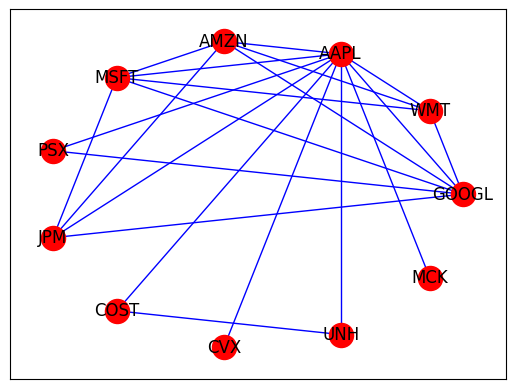

In [62]:

import networkx as nx
Graph_news = nx.Graph(tuplesWithCount.keys())
nx.draw_networkx(Graph_news, pos = nx.circular_layout(Graph_news), node_color = 'r', edge_color = 'b')
#tuplesWithCount.keys()

# Finally Create graph based on financial news

In [17]:
import os
os.getcwd()
os.chdir('../../../../')
#os.chdir('./mcmaster/meng/747/project/')
os.getcwd()

'c:\\my_works_2021_07_25\\hd-thing\\mcmaster\\meng\\747\\project'

In [18]:
# Now create node data i.e time series to pass as part of the nodes
'''
df = pd.DataFrame();
data_file = "../../../..//archive/stock_market_data/nasdaq/nasdq-stock-price--all-merged.csv"
# stock-price--all-merged.csv"
df = pd.read_csv(data_file);
df.head()
'''

# this is the place where the new dataset starts i.e. fortune 30 companies
df = pd.DataFrame();
data_file = "per-day-fortune-30-company-stock-price-data.csv";
df = pd.read_csv("./data/" + data_file, low_memory = False);
df.head()

,Date,AAPL,ABC,AMZN,ANTM,BA,BAC,CAH,COST,CVS,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2017-01-03 00:00:00,29.037500,82.610001,37.683498,NaN,156.970001,22.530001,74.480003,159.729996,80.349998,...,43.546665,86.790001,32.492447,161.449997,102.519997,54.580002,82.959999,56.000000,68.660004,90.889999
1,2017-01-04 00:00:00,29.004999,84.660004,37.859001,NaN,158.619995,22.950001,75.629997,159.759995,79.750000,...,44.146667,87.260002,32.303623,161.910004,103.139999,54.520000,82.980003,56.049999,69.059998,89.889999
2,2017-01-05 00:00:00,29.152500,83.680000,39.022499,NaN,158.710007,22.680000,74.500000,162.910004,81.419998,...,43.426666,86.739998,32.212990,162.179993,102.129997,54.639999,83.029999,55.180000,69.209999,88.550003
3,2017-01-06 00:00:00,29.477501,84.800003,39.799500,NaN,159.100006,22.680000,75.330002,162.830002,82.199997,...,43.919998,85.400002,31.208460,162.410004,103.190002,53.259998,83.099998,55.040001,68.260002,88.500000
4,2017-01-09 00:00:00,29.747499,85.480003,39.846001,NaN,158.320007,22.549999,74.760002,160.970001,81.699997,...,43.380001,84.019997,30.815710,161.949997,102.419998,52.680000,82.550003,54.240002,68.709999,87.040001


In [19]:
df.index

RangeIndex(start=0, stop=753, step=1)

In [20]:
drop_cols_with_na = 1
drop_rows_with_na = 0


In [21]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html


try:
  df = df.interpolate(inplace = False)
except:
  print("An exception occurred. Operation ignored")
  exit
    
df.isnull().values.any()
df[df.isna().any(axis = 1)]  


#----



if drop_cols_with_na == 1:
    df = df.dropna(axis = 1);    
   
df, df.shape

## -- 

df.isnull().values.any()
df[df.isna().any( axis = 1 )]


## --

# df_s_transpose.index = df_s_transpose['Date']
#df.index = df.index.astype('datetime64[ns]')
df

,Date,AAPL,ABC,AMZN,BA,BAC,CAH,COST,CVS,CVX,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2017-01-03 00:00:00,29.037500,82.610001,37.683498,156.970001,22.530001,74.480003,159.729996,80.349998,117.849998,...,43.546665,86.790001,32.492447,161.449997,102.519997,54.580002,82.959999,56.000000,68.660004,90.889999
1,2017-01-04 00:00:00,29.004999,84.660004,37.859001,158.619995,22.950001,75.629997,159.759995,79.750000,117.820000,...,44.146667,87.260002,32.303623,161.910004,103.139999,54.520000,82.980003,56.049999,69.059998,89.889999
2,2017-01-05 00:00:00,29.152500,83.680000,39.022499,158.710007,22.680000,74.500000,162.910004,81.419998,117.309998,...,43.426666,86.739998,32.212990,162.179993,102.129997,54.639999,83.029999,55.180000,69.209999,88.550003
3,2017-01-06 00:00:00,29.477501,84.800003,39.799500,159.100006,22.680000,75.330002,162.830002,82.199997,116.839996,...,43.919998,85.400002,31.208460,162.410004,103.190002,53.259998,83.099998,55.040001,68.260002,88.500000
4,2017-01-09 00:00:00,29.747499,85.480003,39.846001,158.320007,22.549999,74.760002,160.970001,81.699997,115.839996,...,43.380001,84.019997,30.815710,161.949997,102.419998,52.680000,82.550003,54.240002,68.709999,87.040001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2019-12-23 00:00:00,71.000000,85.599998,89.650002,337.549988,35.169998,51.130001,293.309998,74.379997,120.330002,...,53.033333,112.669998,29.509064,295.089996,179.419998,61.400002,58.570000,53.810001,119.029999,70.290001
749,2019-12-24 00:00:00,71.067497,85.419998,89.460503,333.000000,35.220001,51.290001,294.230011,74.510002,120.339996,...,52.993332,113.199997,29.425982,294.540009,179.889999,61.279999,58.349998,53.820000,119.510002,70.019997
750,2019-12-26 00:00:00,72.477501,85.050003,93.438499,329.920013,35.520000,51.169998,295.730011,74.480003,120.599998,...,53.006668,112.059998,29.577040,295.649994,180.809998,61.290001,58.900002,54.150002,119.519997,70.129997
751,2019-12-27 00:00:00,72.449997,84.910004,93.489998,330.140015,35.349998,51.500000,294.109985,74.400002,120.300003,...,52.939999,110.599998,29.637463,295.970001,181.410004,61.529999,59.020000,53.919998,119.589996,69.889999


In [22]:
df_s =  df #[ ['Ticker', 'Date', 'Adjusted Close'] ];
df_s

,Date,AAPL,ABC,AMZN,BA,BAC,CAH,COST,CVS,CVX,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2017-01-03 00:00:00,29.037500,82.610001,37.683498,156.970001,22.530001,74.480003,159.729996,80.349998,117.849998,...,43.546665,86.790001,32.492447,161.449997,102.519997,54.580002,82.959999,56.000000,68.660004,90.889999
1,2017-01-04 00:00:00,29.004999,84.660004,37.859001,158.619995,22.950001,75.629997,159.759995,79.750000,117.820000,...,44.146667,87.260002,32.303623,161.910004,103.139999,54.520000,82.980003,56.049999,69.059998,89.889999
2,2017-01-05 00:00:00,29.152500,83.680000,39.022499,158.710007,22.680000,74.500000,162.910004,81.419998,117.309998,...,43.426666,86.739998,32.212990,162.179993,102.129997,54.639999,83.029999,55.180000,69.209999,88.550003
3,2017-01-06 00:00:00,29.477501,84.800003,39.799500,159.100006,22.680000,75.330002,162.830002,82.199997,116.839996,...,43.919998,85.400002,31.208460,162.410004,103.190002,53.259998,83.099998,55.040001,68.260002,88.500000
4,2017-01-09 00:00:00,29.747499,85.480003,39.846001,158.320007,22.549999,74.760002,160.970001,81.699997,115.839996,...,43.380001,84.019997,30.815710,161.949997,102.419998,52.680000,82.550003,54.240002,68.709999,87.040001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2019-12-23 00:00:00,71.000000,85.599998,89.650002,337.549988,35.169998,51.130001,293.309998,74.379997,120.330002,...,53.033333,112.669998,29.509064,295.089996,179.419998,61.400002,58.570000,53.810001,119.029999,70.290001
749,2019-12-24 00:00:00,71.067497,85.419998,89.460503,333.000000,35.220001,51.290001,294.230011,74.510002,120.339996,...,52.993332,113.199997,29.425982,294.540009,179.889999,61.279999,58.349998,53.820000,119.510002,70.019997
750,2019-12-26 00:00:00,72.477501,85.050003,93.438499,329.920013,35.520000,51.169998,295.730011,74.480003,120.599998,...,53.006668,112.059998,29.577040,295.649994,180.809998,61.290001,58.900002,54.150002,119.519997,70.129997
751,2019-12-27 00:00:00,72.449997,84.910004,93.489998,330.140015,35.349998,51.500000,294.109985,74.400002,120.300003,...,52.939999,110.599998,29.637463,295.970001,181.410004,61.529999,59.020000,53.919998,119.589996,69.889999


In [23]:
df_s["Date"] = df_s["Date"].astype('datetime64[ns]')
df_s = df_s.sort_values( by = 'Date', ascending = True )
df_s

,Date,AAPL,ABC,AMZN,BA,BAC,CAH,COST,CVS,CVX,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2017-01-03,29.037500,82.610001,37.683498,156.970001,22.530001,74.480003,159.729996,80.349998,117.849998,...,43.546665,86.790001,32.492447,161.449997,102.519997,54.580002,82.959999,56.000000,68.660004,90.889999
1,2017-01-04,29.004999,84.660004,37.859001,158.619995,22.950001,75.629997,159.759995,79.750000,117.820000,...,44.146667,87.260002,32.303623,161.910004,103.139999,54.520000,82.980003,56.049999,69.059998,89.889999
2,2017-01-05,29.152500,83.680000,39.022499,158.710007,22.680000,74.500000,162.910004,81.419998,117.309998,...,43.426666,86.739998,32.212990,162.179993,102.129997,54.639999,83.029999,55.180000,69.209999,88.550003
3,2017-01-06,29.477501,84.800003,39.799500,159.100006,22.680000,75.330002,162.830002,82.199997,116.839996,...,43.919998,85.400002,31.208460,162.410004,103.190002,53.259998,83.099998,55.040001,68.260002,88.500000
4,2017-01-09,29.747499,85.480003,39.846001,158.320007,22.549999,74.760002,160.970001,81.699997,115.839996,...,43.380001,84.019997,30.815710,161.949997,102.419998,52.680000,82.550003,54.240002,68.709999,87.040001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2019-12-23,71.000000,85.599998,89.650002,337.549988,35.169998,51.130001,293.309998,74.379997,120.330002,...,53.033333,112.669998,29.509064,295.089996,179.419998,61.400002,58.570000,53.810001,119.029999,70.290001
749,2019-12-24,71.067497,85.419998,89.460503,333.000000,35.220001,51.290001,294.230011,74.510002,120.339996,...,52.993332,113.199997,29.425982,294.540009,179.889999,61.279999,58.349998,53.820000,119.510002,70.019997
750,2019-12-26,72.477501,85.050003,93.438499,329.920013,35.520000,51.169998,295.730011,74.480003,120.599998,...,53.006668,112.059998,29.577040,295.649994,180.809998,61.290001,58.900002,54.150002,119.519997,70.129997
751,2019-12-27,72.449997,84.910004,93.489998,330.140015,35.349998,51.500000,294.109985,74.400002,120.300003,...,52.939999,110.599998,29.637463,295.970001,181.410004,61.529999,59.020000,53.919998,119.589996,69.889999


df_s_pivot = df_s.pivot_table(index = 'Ticker', columns = 'Date', values = 'Adjusted Close')
df_s_pivot

In [24]:
allMatchingTickers

{'AAPL',
 'AMZN',
 'COST',
 'CVX',
 'GOOGL',
 'JPM',
 'MCK',
 'MSFT',
 'PSX',
 'UNH',
 'WMT'}



drop_rows_with_na = 0
if drop_rows_with_na == 1:
    df_s_transpose = df_s_transpose.dropna(axis=0);
    #df_s_transpose["Date"] = df_s_transpose["Date"].astype('datetime64[ns]')
    #df_s_transpose.sort_values(by='Date', ascending=False)
    df_s_transpose.to_csv('../../../..//archive/stock_market_data/nasdaq/-na-dropped-nasdq-stock-price--all-merged.csv');
   
df_s_transpose.head(100)



In [25]:
df_s_transpose = df_s #_pivot.T
df_s_transpose

df_s_transpose_feature = df_s_transpose.reset_index(drop = True, inplace=False)
# df_s_transpose_feature =  df_s_transpose_feature.values.tolist()
# print(df_s_transpose_feature.values.tolist())
#df_s_transpose_feature['AAPL'].values



In [26]:
df_s_transpose_feature = df_s_transpose.set_index('Date')

In [27]:
df_s_transpose_feature

,AAPL,ABC,AMZN,BA,BAC,CAH,COST,CVS,CVX,F,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,29.037500,82.610001,37.683498,156.970001,22.530001,74.480003,159.729996,80.349998,117.849998,12.59,...,43.546665,86.790001,32.492447,161.449997,102.519997,54.580002,82.959999,56.000000,68.660004,90.889999
2017-01-04,29.004999,84.660004,37.859001,158.619995,22.950001,75.629997,159.759995,79.750000,117.820000,13.17,...,44.146667,87.260002,32.303623,161.910004,103.139999,54.520000,82.980003,56.049999,69.059998,89.889999
2017-01-05,29.152500,83.680000,39.022499,158.710007,22.680000,74.500000,162.910004,81.419998,117.309998,12.77,...,43.426666,86.739998,32.212990,162.179993,102.129997,54.639999,83.029999,55.180000,69.209999,88.550003
2017-01-06,29.477501,84.800003,39.799500,159.100006,22.680000,75.330002,162.830002,82.199997,116.839996,12.76,...,43.919998,85.400002,31.208460,162.410004,103.190002,53.259998,83.099998,55.040001,68.260002,88.500000
2017-01-09,29.747499,85.480003,39.846001,158.320007,22.549999,74.760002,160.970001,81.699997,115.839996,12.63,...,43.380001,84.019997,30.815710,161.949997,102.419998,52.680000,82.550003,54.240002,68.709999,87.040001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,71.000000,85.599998,89.650002,337.549988,35.169998,51.130001,293.309998,74.379997,120.330002,9.44,...,53.033333,112.669998,29.509064,295.089996,179.419998,61.400002,58.570000,53.810001,119.029999,70.290001
2019-12-24,71.067497,85.419998,89.460503,333.000000,35.220001,51.290001,294.230011,74.510002,120.339996,9.47,...,52.993332,113.199997,29.425982,294.540009,179.889999,61.279999,58.349998,53.820000,119.510002,70.019997
2019-12-26,72.477501,85.050003,93.438499,329.920013,35.520000,51.169998,295.730011,74.480003,120.599998,9.45,...,53.006668,112.059998,29.577040,295.649994,180.809998,61.290001,58.900002,54.150002,119.519997,70.129997


In [28]:
#df_s_transpose['SIMO']

In [29]:
# df_s_transpose_feature['AAPL'].values
len(allMatchingTickers), len(set(allMatchingTickers)) #, df_s['Ticker']
#df_s_tickers = df_s['Ticker'];
#len(df_s_tickers), len(set(allMatchingTickers)), df_s_transpose.columns.unique, len(set(df_s['Ticker']))
#df_s_tickers = list(set(df_s['Ticker'])); # list(df_s_transpose.columns.unique) #
#sorted(df_s_tickers)
#for x in df_s_tickers:
 #   print(x)

(11, 11)

In [30]:
df_s_tickers = df_s_transpose_feature.columns
#df_s_tickers = list(set(df_s_tickers.drop('Date')))
sorted(df_s_tickers[:5])

['AAPL', 'ABC', 'AMZN', 'BA', 'BAC']

In [31]:
set_allMatchingTickers = set(allMatchingTickers)
df_s_tickers = fortune_30_tickers_to_process #list(set(df_s['Ticker'])); # list(df_s_transpose.columns.unique) #
node_Data_financial_news = [];

'''
for x in set_allMatchingTickers :
    # if x in df_s_tickers:
    print(x)
    node_Data_financial_news.append( df_s_transpose_feature[x].values)
'''  

node_Data_financial_news = pd.DataFrame(df_s_transpose_feature) #, index = list(allMatchingTickers)) #, index = list(set_allMatchingTickers))
#node_Data_financial_news = node_Data_financial_news.T 
node_Data_financial_news

,AAPL,ABC,AMZN,BA,BAC,CAH,COST,CVS,CVX,F,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,29.037500,82.610001,37.683498,156.970001,22.530001,74.480003,159.729996,80.349998,117.849998,12.59,...,43.546665,86.790001,32.492447,161.449997,102.519997,54.580002,82.959999,56.000000,68.660004,90.889999
2017-01-04,29.004999,84.660004,37.859001,158.619995,22.950001,75.629997,159.759995,79.750000,117.820000,13.17,...,44.146667,87.260002,32.303623,161.910004,103.139999,54.520000,82.980003,56.049999,69.059998,89.889999
2017-01-05,29.152500,83.680000,39.022499,158.710007,22.680000,74.500000,162.910004,81.419998,117.309998,12.77,...,43.426666,86.739998,32.212990,162.179993,102.129997,54.639999,83.029999,55.180000,69.209999,88.550003
2017-01-06,29.477501,84.800003,39.799500,159.100006,22.680000,75.330002,162.830002,82.199997,116.839996,12.76,...,43.919998,85.400002,31.208460,162.410004,103.190002,53.259998,83.099998,55.040001,68.260002,88.500000
2017-01-09,29.747499,85.480003,39.846001,158.320007,22.549999,74.760002,160.970001,81.699997,115.839996,12.63,...,43.380001,84.019997,30.815710,161.949997,102.419998,52.680000,82.550003,54.240002,68.709999,87.040001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,71.000000,85.599998,89.650002,337.549988,35.169998,51.130001,293.309998,74.379997,120.330002,9.44,...,53.033333,112.669998,29.509064,295.089996,179.419998,61.400002,58.570000,53.810001,119.029999,70.290001
2019-12-24,71.067497,85.419998,89.460503,333.000000,35.220001,51.290001,294.230011,74.510002,120.339996,9.47,...,52.993332,113.199997,29.425982,294.540009,179.889999,61.279999,58.349998,53.820000,119.510002,70.019997
2019-12-26,72.477501,85.050003,93.438499,329.920013,35.520000,51.169998,295.730011,74.480003,120.599998,9.45,...,53.006668,112.059998,29.577040,295.649994,180.809998,61.290001,58.900002,54.150002,119.519997,70.129997


In [32]:
node_Data_financial_news = node_Data_financial_news.T
node_Data_financial_news

Date,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,...,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30
AAPL,29.037500,29.004999,29.152500,29.477501,29.747499,29.777500,29.937500,29.812500,29.760000,30.000000,...,69.964996,70.102501,69.934998,70.004997,69.860001,71.000000,71.067497,72.477501,72.449997,72.879997
ABC,82.610001,84.660004,83.680000,84.800003,85.480003,84.830002,81.529999,83.860001,84.620003,85.989998,...,85.959999,83.150002,83.550003,83.800003,85.669998,85.599998,85.419998,85.050003,84.910004,83.639999
AMZN,37.683498,37.859001,39.022499,39.799500,39.846001,39.794998,39.951000,40.681999,40.856998,40.486000,...,88.460503,89.532997,89.201500,89.613998,89.324997,89.650002,89.460503,93.438499,93.489998,92.344498
BA,156.970001,158.619995,158.710007,159.100006,158.320007,159.070007,159.399994,158.289993,158.830002,157.669998,...,327.000000,327.000000,330.679993,333.500000,328.000000,337.549988,333.000000,329.920013,330.140015,326.399994
BAC,22.530001,22.950001,22.680000,22.680000,22.549999,22.940001,23.070000,22.920000,23.010000,22.049999,...,34.700001,35.040001,35.110001,34.950001,34.959999,35.169998,35.220001,35.520000,35.349998,35.150002
CAH,74.480003,75.629997,74.500000,75.330002,74.760002,75.220001,73.720001,74.190002,75.000000,75.180000,...,53.700001,51.570000,51.099998,50.610001,51.799999,51.130001,51.290001,51.169998,51.500000,50.770000
COST,159.729996,159.759995,162.910004,162.830002,160.970001,161.660004,161.539993,161.869995,161.860001,163.809998,...,293.500000,295.549988,291.869995,293.709991,294.829987,293.309998,294.230011,295.730011,294.109985,295.140015
CVS,80.349998,79.750000,81.419998,82.199997,81.699997,82.669998,82.769997,82.599998,81.980003,83.919998,...,74.400002,73.349998,73.279999,74.099998,74.580002,74.379997,74.510002,74.480003,74.400002,73.699997
CVX,117.849998,117.820000,117.309998,116.839996,115.839996,114.959999,115.930000,116.160004,116.379997,116.279999,...,119.360001,118.599998,118.550003,118.129997,119.680000,120.330002,120.339996,120.599998,120.300003,119.849998
F,12.590000,13.170000,12.770000,12.760000,12.630000,12.850000,12.670000,12.590000,12.630000,12.610000,...,9.390000,9.390000,9.540000,9.410000,9.480000,9.440000,9.470000,9.450000,9.360000,9.250000


In [33]:
node_Data_financial_news

Date,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,...,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30
AAPL,29.037500,29.004999,29.152500,29.477501,29.747499,29.777500,29.937500,29.812500,29.760000,30.000000,...,69.964996,70.102501,69.934998,70.004997,69.860001,71.000000,71.067497,72.477501,72.449997,72.879997
ABC,82.610001,84.660004,83.680000,84.800003,85.480003,84.830002,81.529999,83.860001,84.620003,85.989998,...,85.959999,83.150002,83.550003,83.800003,85.669998,85.599998,85.419998,85.050003,84.910004,83.639999
AMZN,37.683498,37.859001,39.022499,39.799500,39.846001,39.794998,39.951000,40.681999,40.856998,40.486000,...,88.460503,89.532997,89.201500,89.613998,89.324997,89.650002,89.460503,93.438499,93.489998,92.344498
BA,156.970001,158.619995,158.710007,159.100006,158.320007,159.070007,159.399994,158.289993,158.830002,157.669998,...,327.000000,327.000000,330.679993,333.500000,328.000000,337.549988,333.000000,329.920013,330.140015,326.399994
BAC,22.530001,22.950001,22.680000,22.680000,22.549999,22.940001,23.070000,22.920000,23.010000,22.049999,...,34.700001,35.040001,35.110001,34.950001,34.959999,35.169998,35.220001,35.520000,35.349998,35.150002
CAH,74.480003,75.629997,74.500000,75.330002,74.760002,75.220001,73.720001,74.190002,75.000000,75.180000,...,53.700001,51.570000,51.099998,50.610001,51.799999,51.130001,51.290001,51.169998,51.500000,50.770000
COST,159.729996,159.759995,162.910004,162.830002,160.970001,161.660004,161.539993,161.869995,161.860001,163.809998,...,293.500000,295.549988,291.869995,293.709991,294.829987,293.309998,294.230011,295.730011,294.109985,295.140015
CVS,80.349998,79.750000,81.419998,82.199997,81.699997,82.669998,82.769997,82.599998,81.980003,83.919998,...,74.400002,73.349998,73.279999,74.099998,74.580002,74.379997,74.510002,74.480003,74.400002,73.699997
CVX,117.849998,117.820000,117.309998,116.839996,115.839996,114.959999,115.930000,116.160004,116.379997,116.279999,...,119.360001,118.599998,118.550003,118.129997,119.680000,120.330002,120.339996,120.599998,120.300003,119.849998
F,12.590000,13.170000,12.770000,12.760000,12.630000,12.850000,12.670000,12.590000,12.630000,12.610000,...,9.390000,9.390000,9.540000,9.410000,9.480000,9.440000,9.470000,9.450000,9.360000,9.250000


node_Data_financial_news#.drop(axis = 0)
node_Data_financial_news = node_Data_financial_news.T
node_Data_financial_news

node_Data_financial_news = node_Data_financial_news.drop('Date')
node_Data_financial_news

In [34]:
financial_news_edge_data = pd.DataFrame(
    {"source": source, "target": target, "edge_feature": edge_weights}
)

financial_news_graph = StellarGraph(node_Data_financial_news, edges = financial_news_edge_data, node_type_default="corner", edge_type_default="line")
print(financial_news_graph.info())

StellarGraph: Undirected multigraph
 Nodes: 28, Edges: 21

 Node types:
  corner: [28]
    Features: float32 vector, length 753
    Edge types: corner-line->corner

 Edge types:
    corner-line->corner: [21]
        Weights: all 1 (default)
        Features: float32 vector, length 1


In [35]:
# debug code
# financial_news_graph_data,  sorted(node_Data_financial_news.columns.unique())
# [1,2] + [2, 3,4], set(source + target).difference(sorted(node_Data_financial_news.columns.unique()))

In [36]:
# Generator
generator = FullBatchNodeGenerator(financial_news_graph, method = "gcn")


Using GCN (local pooling) filters...


# Machine Learning, Deep Learning, GCN, CNN

# Train Test Split

In [37]:
train_subjects, test_subjects = model_selection.train_test_split(
    node_Data_financial_news #, train_size = 6, test_size = 4
)
# , train_size=6, test_size=None, stratify=pearson_graph_node_data

val_subjects, test_subjects_step_2 = model_selection.train_test_split(
    test_subjects #, test_size = 2
)

#, train_size = 500, test_size = None, stratify = test_subjects


train_subjects.shape, test_subjects.shape, val_subjects.shape, test_subjects_step_2.shape

((21, 753), (7, 753), (5, 753), (2, 753))

In [38]:
# just the target variables

train_targets = train_subjects; 
val_targets = val_subjects; 
test_targets = test_subjects; 

In [39]:
# Architecture of the Neural Network
train_subjects.index, train_targets

(Index(['CVX', 'COST', 'PSX', 'BA', 'HD', 'GM', 'KR', 'UNH', 'XOM', 'WFC',
        'WBA', 'JPM', 'UNP', 'AAPL', 'GOOGL', 'PCAR', 'CVS', 'VZ', 'AMZN',
        'MCK', 'F'],
       dtype='object'),
 Date   2017-01-03  2017-01-04  2017-01-05  2017-01-06  2017-01-09  2017-01-10  \
 CVX    117.849998  117.820000  117.309998  116.839996  115.839996  114.959999   
 COST   159.729996  159.759995  162.910004  162.830002  160.970001  161.660004   
 PSX     86.790001   87.260002   86.739998   85.400002   84.019997   83.760002   
 BA     156.970001  158.619995  158.710007  159.100006  158.320007  159.070007   
 HD     134.309998  135.500000  133.899994  133.529999  134.309998  136.100006   
 GM      35.150002   37.090000   36.389999   35.990002   36.009998   37.349998   
 KR      33.720001   33.240002   33.209999   33.110001   32.919998   33.189999   
 UNH    161.449997  161.910004  162.179993  162.410004  161.949997  161.580002   
 XOM     90.889999   89.889999   88.550003   88.500000   87.040001 

In [40]:
train_gen = generator.flow(train_subjects.index, train_targets)

In [41]:
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow import keras

layer_sizes = [32, 32]
activations = ["relu", "relu"]

gcn = GCN(layer_sizes = layer_sizes, activations = activations, generator = generator) #, dropout = 0.5
x_inp, x_out = gcn.in_out_tensors()

# MLP -- Regression
predictions = layers.Dense(units = train_targets.shape[1], activation = "linear")(x_out)
x_out, 
x_inp, x_out

([<KerasTensor: shape=(1, 28, 753) dtype=float32 (created by layer 'input_1')>,
  <KerasTensor: shape=(1, None) dtype=int32 (created by layer 'input_2')>,
  <KerasTensor: shape=(1, None, 2) dtype=int64 (created by layer 'input_3')>,
  <KerasTensor: shape=(1, None) dtype=float32 (created by layer 'input_4')>],
 <KerasTensor: shape=(1, None, 32) dtype=float32 (created by layer 'gather_indices')>)

# Models

In [42]:
# loss functions: https://keras.io/api/losses/

model = Model(
    inputs = x_inp, outputs = predictions)

'''
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.1),
    loss=losses.MeanSquaredError(),
    metrics=["acc"],
)
'''

# REF: https://stackoverflow.com/questions/57301698/how-to-change-a-learning-rate-for-adam-in-tf2
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/PolynomialDecay
train_steps = 1000
lr_fn = optimizers.schedules.PolynomialDecay(1e-3, train_steps, 1e-5, 2)


# https://keras.io/api/metrics/
model.compile(
    loss = 'mean_absolute_error', 
    optimizer = optimizers.Adam( lr_fn ),
    # metrics = ['mean_squared_error']
    metrics=['mse', 'mae', 'mape']
)

# mape: https://towardsdatascience.com/choosing-the-correct-error-metric-mape-vs-smape-5328dec53fac
model.compile( 
    loss = 'mean_absolute_error', 
    optimizer = optimizers.Adam(learning_rate = 0.015), 
    #optimizer = optimizers.Adam(lr_fn), 
    # metrics=['mean_squared_error']
    metrics=['mean_squared_error', 'mae', 'mape']
    # metrics=[
    #    metrics.MeanSquaredError(),
    #    metrics.AUC(),
    #]
)

In [43]:
len(x_inp), predictions.shape, print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 28, 753)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(1, None, 2)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(1, None)]          0           []                               
                                                                                                  
 dropout (Dropout)              (1, 28, 753)         0           ['input_1[0][0]']                
                                                                                              

(4, TensorShape([1, None, 753]), None)

In [44]:
len(val_subjects)
test_subjects_ = test_subjects[:len(val_subjects)]

In [45]:
# hard coded size adjustments
test_subjects_ = test_subjects[:len(val_subjects)]

val_gen = generator.flow(val_subjects.index, test_subjects_)
#train_gen[1], val_gen[1]

In [46]:
epochs_to_test = 1000
patience_to_test = 1000
data_valid = val_gen #[:1][:4];
train_gen_data = train_gen #[:1][:4];

In [47]:
type(train_gen_data), type(data_valid), type(x_inp), type(x_out) 

(stellargraph.mapper.sequences.SparseFullBatchSequence,
 stellargraph.mapper.sequences.SparseFullBatchSequence,
 list,
 keras.engine.keras_tensor.KerasTensor)

Epoch 1/1000
1/1 - 2s - loss: 102.7993 - mean_squared_error: 16817.6426 - mae: 102.7993 - mape: 100.4893 - val_loss: 59.6593 - val_mean_squared_error: 5711.7983 - val_mae: 59.6593 - val_mape: 98.2147 - 2s/epoch - 2s/step
Epoch 2/1000
1/1 - 0s - loss: 85.4719 - mean_squared_error: 15815.0508 - mae: 85.4719 - mape: 92.0278 - val_loss: 60.1438 - val_mean_squared_error: 5881.2256 - val_mae: 60.1438 - val_mape: 108.9469 - 60ms/epoch - 60ms/step
Epoch 3/1000
1/1 - 0s - loss: 84.2053 - mean_squared_error: 16048.2871 - mae: 84.2053 - mape: 99.0079 - val_loss: 48.4549 - val_mean_squared_error: 3758.8345 - val_mae: 48.4549 - val_mape: 70.1886 - 64ms/epoch - 64ms/step
Epoch 4/1000
1/1 - 0s - loss: 71.3443 - mean_squared_error: 9720.6592 - mae: 71.3443 - mape: 68.9057 - val_loss: 44.1292 - val_mean_squared_error: 3314.9719 - val_mae: 44.1292 - val_mape: 65.8914 - 70ms/epoch - 70ms/step
Epoch 5/1000
1/1 - 0s - loss: 63.2076 - mean_squared_error: 8247.1670 - mae: 63.2076 - mape: 62.1974 - val_loss: 

Epoch 38/1000
1/1 - 0s - loss: 28.0425 - mean_squared_error: 1902.1335 - mae: 28.0425 - mape: 33.4122 - val_loss: 27.9867 - val_mean_squared_error: 1533.3966 - val_mae: 27.9867 - val_mape: 51.1259 - 58ms/epoch - 58ms/step
Epoch 39/1000
1/1 - 0s - loss: 28.8376 - mean_squared_error: 2017.5721 - mae: 28.8376 - mape: 38.4334 - val_loss: 25.2043 - val_mean_squared_error: 1498.1711 - val_mae: 25.2043 - val_mape: 41.3412 - 60ms/epoch - 60ms/step
Epoch 40/1000
1/1 - 0s - loss: 28.3422 - mean_squared_error: 1913.2017 - mae: 28.3422 - mape: 33.0766 - val_loss: 26.7345 - val_mean_squared_error: 1501.8967 - val_mae: 26.7345 - val_mape: 47.7790 - 60ms/epoch - 60ms/step
Epoch 41/1000
1/1 - 0s - loss: 27.9230 - mean_squared_error: 1916.1509 - mae: 27.9230 - mape: 36.4180 - val_loss: 25.6632 - val_mean_squared_error: 1490.8019 - val_mae: 25.6632 - val_mape: 43.8272 - 63ms/epoch - 63ms/step
Epoch 42/1000
1/1 - 0s - loss: 27.4220 - mean_squared_error: 1859.5693 - mae: 27.4220 - mape: 33.9915 - val_loss

Epoch 75/1000
1/1 - 0s - loss: 26.0978 - mean_squared_error: 1811.6421 - mae: 26.0978 - mape: 34.1858 - val_loss: 29.7137 - val_mean_squared_error: 1867.5592 - val_mae: 29.7137 - val_mape: 45.6998 - 69ms/epoch - 69ms/step
Epoch 76/1000
1/1 - 0s - loss: 28.6616 - mean_squared_error: 1897.9408 - mae: 28.6616 - mape: 31.9713 - val_loss: 36.5678 - val_mean_squared_error: 2275.1987 - val_mae: 36.5678 - val_mape: 64.4274 - 64ms/epoch - 64ms/step
Epoch 77/1000
1/1 - 0s - loss: 29.9648 - mean_squared_error: 2150.1160 - mae: 29.9648 - mape: 41.3919 - val_loss: 31.9686 - val_mean_squared_error: 2035.3640 - val_mae: 31.9686 - val_mape: 52.9283 - 54ms/epoch - 54ms/step
Epoch 78/1000
1/1 - 0s - loss: 25.1766 - mean_squared_error: 1737.6201 - mae: 25.1766 - mape: 32.4025 - val_loss: 30.0264 - val_mean_squared_error: 1852.6478 - val_mae: 30.0264 - val_mape: 44.6830 - 63ms/epoch - 63ms/step
Epoch 79/1000
1/1 - 0s - loss: 30.8538 - mean_squared_error: 2047.3235 - mae: 30.8538 - mape: 33.2115 - val_loss

Epoch 112/1000
1/1 - 0s - loss: 24.8809 - mean_squared_error: 1744.7241 - mae: 24.8809 - mape: 31.6726 - val_loss: 32.7996 - val_mean_squared_error: 2130.2566 - val_mae: 32.7996 - val_mape: 52.9320 - 82ms/epoch - 82ms/step
Epoch 113/1000
1/1 - 0s - loss: 24.7477 - mean_squared_error: 1729.3466 - mae: 24.7477 - mape: 30.9967 - val_loss: 32.3539 - val_mean_squared_error: 2074.6890 - val_mae: 32.3539 - val_mape: 51.8503 - 78ms/epoch - 78ms/step
Epoch 114/1000
1/1 - 0s - loss: 24.6616 - mean_squared_error: 1723.0973 - mae: 24.6616 - mape: 30.4784 - val_loss: 33.2358 - val_mean_squared_error: 2063.7192 - val_mae: 33.2358 - val_mape: 54.0221 - 84ms/epoch - 84ms/step
Epoch 115/1000
1/1 - 0s - loss: 24.8270 - mean_squared_error: 1738.3488 - mae: 24.8270 - mape: 31.6145 - val_loss: 33.4107 - val_mean_squared_error: 2127.2285 - val_mae: 33.4107 - val_mape: 54.0346 - 84ms/epoch - 84ms/step
Epoch 116/1000
1/1 - 0s - loss: 24.5015 - mean_squared_error: 1718.9537 - mae: 24.5015 - mape: 30.9070 - val

Epoch 149/1000
1/1 - 0s - loss: 24.5854 - mean_squared_error: 1710.2318 - mae: 24.5854 - mape: 30.6974 - val_loss: 34.5856 - val_mean_squared_error: 2283.1292 - val_mae: 34.5856 - val_mape: 55.6397 - 66ms/epoch - 66ms/step
Epoch 150/1000
1/1 - 0s - loss: 24.2521 - mean_squared_error: 1712.8966 - mae: 24.2521 - mape: 31.2894 - val_loss: 33.7003 - val_mean_squared_error: 2155.5757 - val_mae: 33.7003 - val_mape: 53.9501 - 153ms/epoch - 153ms/step
Epoch 151/1000
1/1 - 0s - loss: 24.2986 - mean_squared_error: 1714.4805 - mae: 24.2986 - mape: 31.0559 - val_loss: 33.6225 - val_mean_squared_error: 2199.1294 - val_mae: 33.6225 - val_mape: 53.4219 - 86ms/epoch - 86ms/step
Epoch 152/1000
1/1 - 0s - loss: 24.2565 - mean_squared_error: 1702.9204 - mae: 24.2565 - mape: 30.5586 - val_loss: 35.6251 - val_mean_squared_error: 2376.2937 - val_mae: 35.6251 - val_mape: 57.8656 - 86ms/epoch - 86ms/step
Epoch 153/1000
1/1 - 0s - loss: 24.5828 - mean_squared_error: 1734.2877 - mae: 24.5828 - mape: 32.3029 - v

Epoch 186/1000
1/1 - 0s - loss: 24.0529 - mean_squared_error: 1698.4948 - mae: 24.0529 - mape: 30.9132 - val_loss: 35.4793 - val_mean_squared_error: 2309.3735 - val_mae: 35.4793 - val_mape: 57.0086 - 69ms/epoch - 69ms/step
Epoch 187/1000
1/1 - 0s - loss: 24.3573 - mean_squared_error: 1739.3992 - mae: 24.3573 - mape: 32.3185 - val_loss: 33.7046 - val_mean_squared_error: 2276.3145 - val_mae: 33.7046 - val_mape: 52.0198 - 72ms/epoch - 72ms/step
Epoch 188/1000
1/1 - 0s - loss: 25.2499 - mean_squared_error: 1720.1821 - mae: 25.2499 - mape: 30.7517 - val_loss: 37.7395 - val_mean_squared_error: 2543.3901 - val_mae: 37.7395 - val_mape: 61.6574 - 63ms/epoch - 63ms/step
Epoch 189/1000
1/1 - 0s - loss: 25.4140 - mean_squared_error: 1812.4204 - mae: 25.4140 - mape: 34.5949 - val_loss: 34.5432 - val_mean_squared_error: 2325.0044 - val_mae: 34.5432 - val_mape: 54.2020 - 65ms/epoch - 65ms/step
Epoch 190/1000
1/1 - 0s - loss: 24.3591 - mean_squared_error: 1700.6602 - mae: 24.3591 - mape: 30.8428 - val

Epoch 223/1000
1/1 - 0s - loss: 23.8483 - mean_squared_error: 1700.1143 - mae: 23.8483 - mape: 31.3176 - val_loss: 35.9647 - val_mean_squared_error: 2334.9553 - val_mae: 35.9647 - val_mape: 57.2076 - 59ms/epoch - 59ms/step
Epoch 224/1000
1/1 - 0s - loss: 24.5189 - mean_squared_error: 1759.1556 - mae: 24.5189 - mape: 32.7773 - val_loss: 35.4192 - val_mean_squared_error: 2523.0852 - val_mae: 35.4192 - val_mape: 53.7220 - 64ms/epoch - 64ms/step
Epoch 225/1000
1/1 - 0s - loss: 25.2237 - mean_squared_error: 1714.0930 - mae: 25.2237 - mape: 30.9301 - val_loss: 41.3874 - val_mean_squared_error: 3122.7095 - val_mae: 41.3874 - val_mape: 66.3774 - 61ms/epoch - 61ms/step
Epoch 226/1000
1/1 - 0s - loss: 25.5849 - mean_squared_error: 1842.3657 - mae: 25.5849 - mape: 35.5198 - val_loss: 37.7529 - val_mean_squared_error: 2768.2708 - val_mae: 37.7529 - val_mape: 58.5286 - 81ms/epoch - 81ms/step
Epoch 227/1000
1/1 - 0s - loss: 24.1240 - mean_squared_error: 1699.0251 - mae: 24.1240 - mape: 31.4779 - val

Epoch 260/1000
1/1 - 0s - loss: 24.9555 - mean_squared_error: 1814.9801 - mae: 24.9555 - mape: 34.4796 - val_loss: 40.2955 - val_mean_squared_error: 3344.8516 - val_mae: 40.2955 - val_mape: 58.6111 - 85ms/epoch - 85ms/step
Epoch 261/1000
1/1 - 0s - loss: 25.6366 - mean_squared_error: 1721.7379 - mae: 25.6366 - mape: 31.2900 - val_loss: 46.7955 - val_mean_squared_error: 4142.8975 - val_mae: 46.7955 - val_mape: 72.6994 - 70ms/epoch - 70ms/step
Epoch 262/1000
1/1 - 0s - loss: 24.9954 - mean_squared_error: 1819.5288 - mae: 24.9954 - mape: 35.0642 - val_loss: 42.5964 - val_mean_squared_error: 3571.4224 - val_mae: 42.5964 - val_mape: 63.6687 - 70ms/epoch - 70ms/step
Epoch 263/1000
1/1 - 0s - loss: 23.7029 - mean_squared_error: 1690.9364 - mae: 23.7029 - mape: 31.4749 - val_loss: 38.5800 - val_mean_squared_error: 2922.7700 - val_mae: 38.5800 - val_mape: 56.5946 - 63ms/epoch - 63ms/step
Epoch 264/1000
1/1 - 0s - loss: 24.8902 - mean_squared_error: 1697.5345 - mae: 24.8902 - mape: 30.9903 - val

Epoch 297/1000
1/1 - 0s - loss: 26.0676 - mean_squared_error: 1941.7507 - mae: 26.0676 - mape: 37.0819 - val_loss: 42.8754 - val_mean_squared_error: 3763.6340 - val_mae: 42.8754 - val_mape: 62.9489 - 77ms/epoch - 77ms/step
Epoch 298/1000
1/1 - 0s - loss: 24.3614 - mean_squared_error: 1686.4626 - mae: 24.3614 - mape: 31.1761 - val_loss: 44.3026 - val_mean_squared_error: 3878.0820 - val_mae: 44.3026 - val_mape: 66.2496 - 78ms/epoch - 78ms/step
Epoch 299/1000
1/1 - 0s - loss: 23.5847 - mean_squared_error: 1698.6875 - mae: 23.5847 - mape: 31.6559 - val_loss: 45.7830 - val_mean_squared_error: 3968.0808 - val_mae: 45.7830 - val_mape: 69.9000 - 71ms/epoch - 71ms/step
Epoch 300/1000
1/1 - 0s - loss: 24.2241 - mean_squared_error: 1786.3065 - mae: 24.2241 - mape: 33.7722 - val_loss: 41.1306 - val_mean_squared_error: 3507.6238 - val_mae: 41.1306 - val_mape: 59.3387 - 80ms/epoch - 80ms/step
Epoch 301/1000
1/1 - 0s - loss: 25.6525 - mean_squared_error: 1709.6779 - mae: 25.6525 - mape: 31.5533 - val

Epoch 334/1000
1/1 - 0s - loss: 24.6804 - mean_squared_error: 1681.4152 - mae: 24.6804 - mape: 31.1999 - val_loss: 42.4543 - val_mean_squared_error: 3183.1914 - val_mae: 42.4543 - val_mape: 66.3011 - 69ms/epoch - 69ms/step
Epoch 335/1000
1/1 - 0s - loss: 25.6180 - mean_squared_error: 1917.7660 - mae: 25.6180 - mape: 36.3815 - val_loss: 39.0665 - val_mean_squared_error: 3021.0334 - val_mae: 39.0665 - val_mape: 57.6785 - 66ms/epoch - 66ms/step
Epoch 336/1000
1/1 - 0s - loss: 23.3557 - mean_squared_error: 1671.8387 - mae: 23.3557 - mape: 30.9829 - val_loss: 40.3117 - val_mean_squared_error: 3260.7522 - val_mae: 40.3117 - val_mape: 59.7693 - 59ms/epoch - 59ms/step
Epoch 337/1000
1/1 - 0s - loss: 23.4160 - mean_squared_error: 1676.7057 - mae: 23.4160 - mape: 31.1321 - val_loss: 43.6032 - val_mean_squared_error: 3452.3950 - val_mae: 43.6032 - val_mape: 67.8674 - 69ms/epoch - 69ms/step
Epoch 338/1000
1/1 - 0s - loss: 25.0684 - mean_squared_error: 1874.6207 - mae: 25.0684 - mape: 35.7813 - val

Epoch 371/1000
1/1 - 0s - loss: 22.7143 - mean_squared_error: 1675.8630 - mae: 22.7143 - mape: 31.1942 - val_loss: 43.1730 - val_mean_squared_error: 3542.7019 - val_mae: 43.1730 - val_mape: 65.3024 - 65ms/epoch - 65ms/step
Epoch 372/1000
1/1 - 0s - loss: 23.4747 - mean_squared_error: 1773.6135 - mae: 23.4747 - mape: 33.4831 - val_loss: 39.4723 - val_mean_squared_error: 3304.1616 - val_mae: 39.4723 - val_mape: 56.3615 - 73ms/epoch - 73ms/step
Epoch 373/1000
1/1 - 0s - loss: 25.6881 - mean_squared_error: 1704.1384 - mae: 25.6881 - mape: 32.0457 - val_loss: 47.0733 - val_mean_squared_error: 4058.2668 - val_mae: 47.0733 - val_mape: 73.4411 - 94ms/epoch - 94ms/step
Epoch 374/1000
1/1 - 0s - loss: 25.8560 - mean_squared_error: 1976.6815 - mae: 25.8560 - mape: 37.7097 - val_loss: 39.3626 - val_mean_squared_error: 3124.0391 - val_mae: 39.3626 - val_mape: 57.0982 - 65ms/epoch - 65ms/step
Epoch 375/1000
1/1 - 0s - loss: 23.4761 - mean_squared_error: 1665.9059 - mae: 23.4761 - mape: 31.0798 - val

Epoch 408/1000
1/1 - 0s - loss: 23.5906 - mean_squared_error: 1754.6139 - mae: 23.5906 - mape: 33.3423 - val_loss: 41.7635 - val_mean_squared_error: 3670.4360 - val_mae: 41.7635 - val_mape: 61.2511 - 63ms/epoch - 63ms/step
Epoch 409/1000
1/1 - 0s - loss: 25.0529 - mean_squared_error: 1700.1858 - mae: 25.0529 - mape: 31.3291 - val_loss: 45.3352 - val_mean_squared_error: 4023.7104 - val_mae: 45.3352 - val_mape: 69.4540 - 60ms/epoch - 60ms/step
Epoch 410/1000
1/1 - 0s - loss: 23.3351 - mean_squared_error: 1732.2396 - mae: 23.3351 - mape: 33.0304 - val_loss: 42.3032 - val_mean_squared_error: 3297.8743 - val_mae: 42.3032 - val_mape: 64.5366 - 62ms/epoch - 62ms/step
Epoch 411/1000
1/1 - 0s - loss: 23.6494 - mean_squared_error: 1763.4596 - mae: 23.6494 - mape: 33.5170 - val_loss: 37.3278 - val_mean_squared_error: 2771.1797 - val_mae: 37.3278 - val_mape: 54.2556 - 60ms/epoch - 60ms/step
Epoch 412/1000
1/1 - 0s - loss: 25.3915 - mean_squared_error: 1696.5046 - mae: 25.3915 - mape: 31.4793 - val

Epoch 445/1000
1/1 - 0s - loss: 23.4801 - mean_squared_error: 1788.5573 - mae: 23.4801 - mape: 33.8402 - val_loss: 40.9466 - val_mean_squared_error: 3555.6919 - val_mae: 40.9466 - val_mape: 57.6894 - 66ms/epoch - 66ms/step
Epoch 446/1000
1/1 - 0s - loss: 24.6614 - mean_squared_error: 1661.9568 - mae: 24.6614 - mape: 31.5812 - val_loss: 48.3874 - val_mean_squared_error: 4489.1382 - val_mae: 48.3874 - val_mape: 73.7574 - 81ms/epoch - 81ms/step
Epoch 447/1000
1/1 - 0s - loss: 24.4301 - mean_squared_error: 1876.5532 - mae: 24.4301 - mape: 35.8655 - val_loss: 44.3432 - val_mean_squared_error: 4114.3843 - val_mae: 44.3432 - val_mape: 64.6396 - 87ms/epoch - 87ms/step
Epoch 448/1000
1/1 - 0s - loss: 22.9177 - mean_squared_error: 1662.2372 - mae: 22.9177 - mape: 31.1571 - val_loss: 44.1275 - val_mean_squared_error: 3898.5188 - val_mae: 44.1275 - val_mape: 64.7707 - 96ms/epoch - 96ms/step
Epoch 449/1000
1/1 - 0s - loss: 22.5208 - mean_squared_error: 1702.3545 - mae: 22.5208 - mape: 31.8626 - val

Epoch 482/1000
1/1 - 0s - loss: 22.7024 - mean_squared_error: 1653.8342 - mae: 22.7024 - mape: 31.1869 - val_loss: 36.8488 - val_mean_squared_error: 2414.6641 - val_mae: 36.8488 - val_mape: 57.6884 - 76ms/epoch - 76ms/step
Epoch 483/1000
1/1 - 0s - loss: 24.2641 - mean_squared_error: 1881.0625 - mae: 24.2641 - mape: 35.3902 - val_loss: 34.7966 - val_mean_squared_error: 2406.8357 - val_mae: 34.7966 - val_mape: 51.5269 - 74ms/epoch - 74ms/step
Epoch 484/1000
1/1 - 0s - loss: 23.2854 - mean_squared_error: 1653.9581 - mae: 23.2854 - mape: 31.3107 - val_loss: 41.1493 - val_mean_squared_error: 3045.7673 - val_mae: 41.1493 - val_mape: 65.1912 - 79ms/epoch - 79ms/step
Epoch 485/1000
1/1 - 0s - loss: 23.8850 - mean_squared_error: 1875.9310 - mae: 23.8850 - mape: 35.7812 - val_loss: 36.3286 - val_mean_squared_error: 2695.0002 - val_mae: 36.3286 - val_mape: 55.0265 - 78ms/epoch - 78ms/step
Epoch 486/1000
1/1 - 0s - loss: 25.5356 - mean_squared_error: 1700.5298 - mae: 25.5356 - mape: 32.5795 - val

Epoch 519/1000
1/1 - 0s - loss: 23.3694 - mean_squared_error: 1808.8019 - mae: 23.3694 - mape: 34.4553 - val_loss: 37.9405 - val_mean_squared_error: 2730.6797 - val_mae: 37.9405 - val_mape: 58.0250 - 63ms/epoch - 63ms/step
Epoch 520/1000
1/1 - 0s - loss: 22.6973 - mean_squared_error: 1734.8960 - mae: 22.6973 - mape: 32.9270 - val_loss: 35.9634 - val_mean_squared_error: 2606.0483 - val_mae: 35.9634 - val_mape: 53.5446 - 67ms/epoch - 67ms/step
Epoch 521/1000
1/1 - 0s - loss: 24.2746 - mean_squared_error: 1649.5779 - mae: 24.2746 - mape: 31.3586 - val_loss: 40.8841 - val_mean_squared_error: 3059.5317 - val_mae: 40.8841 - val_mape: 64.1009 - 69ms/epoch - 69ms/step
Epoch 522/1000
1/1 - 0s - loss: 23.7149 - mean_squared_error: 1829.7830 - mae: 23.7149 - mape: 35.1224 - val_loss: 39.8337 - val_mean_squared_error: 3077.7109 - val_mae: 39.8337 - val_mape: 61.5892 - 65ms/epoch - 65ms/step
Epoch 523/1000
1/1 - 0s - loss: 22.6183 - mean_squared_error: 1690.8761 - mae: 22.6183 - mape: 31.9674 - val

Epoch 556/1000
1/1 - 0s - loss: 25.4126 - mean_squared_error: 1677.5533 - mae: 25.4126 - mape: 32.3644 - val_loss: 45.1404 - val_mean_squared_error: 3767.7305 - val_mae: 45.1404 - val_mape: 71.9252 - 61ms/epoch - 61ms/step
Epoch 557/1000
1/1 - 0s - loss: 23.3551 - mean_squared_error: 1874.5621 - mae: 23.3551 - mape: 35.6252 - val_loss: 41.1731 - val_mean_squared_error: 3282.9429 - val_mae: 41.1731 - val_mape: 63.9292 - 62ms/epoch - 62ms/step
Epoch 558/1000
1/1 - 0s - loss: 22.0679 - mean_squared_error: 1657.1626 - mae: 22.0679 - mape: 31.3629 - val_loss: 41.6728 - val_mean_squared_error: 3204.0430 - val_mae: 41.6728 - val_mape: 65.2183 - 63ms/epoch - 63ms/step
Epoch 559/1000
1/1 - 0s - loss: 22.3957 - mean_squared_error: 1750.2611 - mae: 22.3957 - mape: 33.0213 - val_loss: 39.3026 - val_mean_squared_error: 3014.0308 - val_mae: 39.3026 - val_mape: 60.2743 - 66ms/epoch - 66ms/step
Epoch 560/1000
1/1 - 0s - loss: 22.9143 - mean_squared_error: 1639.5693 - mae: 22.9143 - mape: 31.3450 - val

Epoch 593/1000
1/1 - 0s - loss: 22.5031 - mean_squared_error: 1754.5127 - mae: 22.5031 - mape: 33.1607 - val_loss: 40.0116 - val_mean_squared_error: 3057.2756 - val_mae: 40.0116 - val_mape: 61.5955 - 79ms/epoch - 79ms/step
Epoch 594/1000
1/1 - 0s - loss: 22.3484 - mean_squared_error: 1712.1666 - mae: 22.3484 - mape: 32.3092 - val_loss: 39.8404 - val_mean_squared_error: 3103.4683 - val_mae: 39.8404 - val_mape: 61.1511 - 72ms/epoch - 72ms/step
Epoch 595/1000
1/1 - 0s - loss: 22.4796 - mean_squared_error: 1669.4982 - mae: 22.4796 - mape: 31.6300 - val_loss: 42.9879 - val_mean_squared_error: 3303.9231 - val_mae: 42.9879 - val_mape: 67.9402 - 65ms/epoch - 65ms/step
Epoch 596/1000
1/1 - 0s - loss: 23.6987 - mean_squared_error: 1898.1633 - mae: 23.6987 - mape: 36.0161 - val_loss: 37.4756 - val_mean_squared_error: 2756.8577 - val_mae: 37.4756 - val_mape: 56.5561 - 76ms/epoch - 76ms/step
Epoch 597/1000
1/1 - 0s - loss: 24.4233 - mean_squared_error: 1650.4442 - mae: 24.4233 - mape: 31.9248 - val

Epoch 630/1000
1/1 - 0s - loss: 23.3336 - mean_squared_error: 1904.0895 - mae: 23.3336 - mape: 35.8970 - val_loss: 40.8944 - val_mean_squared_error: 3250.4189 - val_mae: 40.8944 - val_mape: 62.9477 - 81ms/epoch - 81ms/step
Epoch 631/1000
1/1 - 0s - loss: 22.1268 - mean_squared_error: 1651.0276 - mae: 22.1268 - mape: 31.5284 - val_loss: 42.2272 - val_mean_squared_error: 3313.4727 - val_mae: 42.2272 - val_mape: 65.7068 - 76ms/epoch - 76ms/step
Epoch 632/1000
1/1 - 0s - loss: 21.9735 - mean_squared_error: 1768.0164 - mae: 21.9735 - mape: 33.2461 - val_loss: 40.2663 - val_mean_squared_error: 3147.5945 - val_mae: 40.2663 - val_mape: 61.5277 - 68ms/epoch - 68ms/step
Epoch 633/1000
1/1 - 0s - loss: 22.2593 - mean_squared_error: 1645.6562 - mae: 22.2593 - mape: 31.4005 - val_loss: 45.3593 - val_mean_squared_error: 3667.8652 - val_mae: 45.3593 - val_mape: 72.0023 - 67ms/epoch - 67ms/step
Epoch 634/1000
1/1 - 0s - loss: 24.5733 - mean_squared_error: 2017.2975 - mae: 24.5733 - mape: 37.9835 - val

Epoch 667/1000
1/1 - 0s - loss: 21.5282 - mean_squared_error: 1680.4740 - mae: 21.5282 - mape: 31.8044 - val_loss: 43.2626 - val_mean_squared_error: 3280.1726 - val_mae: 43.2626 - val_mape: 68.2820 - 60ms/epoch - 60ms/step
Epoch 668/1000
1/1 - 0s - loss: 24.3031 - mean_squared_error: 1964.9851 - mae: 24.3031 - mape: 36.9893 - val_loss: 37.4659 - val_mean_squared_error: 2686.7734 - val_mae: 37.4659 - val_mape: 56.3502 - 58ms/epoch - 58ms/step
Epoch 669/1000
1/1 - 0s - loss: 23.7313 - mean_squared_error: 1632.7866 - mae: 23.7313 - mape: 31.7756 - val_loss: 39.8688 - val_mean_squared_error: 2899.1270 - val_mae: 39.8688 - val_mape: 61.1190 - 70ms/epoch - 70ms/step
Epoch 670/1000
1/1 - 0s - loss: 22.1697 - mean_squared_error: 1745.9072 - mae: 22.1697 - mape: 32.8944 - val_loss: 42.4569 - val_mean_squared_error: 3358.7935 - val_mae: 42.4569 - val_mape: 66.4292 - 83ms/epoch - 83ms/step
Epoch 671/1000
1/1 - 0s - loss: 21.7604 - mean_squared_error: 1774.1182 - mae: 21.7604 - mape: 33.1954 - val

Epoch 704/1000
1/1 - 0s - loss: 24.1505 - mean_squared_error: 1639.7720 - mae: 24.1505 - mape: 31.7704 - val_loss: 42.3192 - val_mean_squared_error: 3468.0298 - val_mae: 42.3192 - val_mape: 64.5794 - 60ms/epoch - 60ms/step
Epoch 705/1000
1/1 - 0s - loss: 21.8390 - mean_squared_error: 1714.0149 - mae: 21.8390 - mape: 32.3969 - val_loss: 44.6229 - val_mean_squared_error: 3736.6531 - val_mae: 44.6229 - val_mape: 69.4669 - 56ms/epoch - 56ms/step
Epoch 706/1000
1/1 - 0s - loss: 23.0464 - mean_squared_error: 1851.0315 - mae: 23.0464 - mape: 35.2898 - val_loss: 40.2601 - val_mean_squared_error: 3305.4023 - val_mae: 40.2601 - val_mape: 60.4249 - 58ms/epoch - 58ms/step
Epoch 707/1000
1/1 - 0s - loss: 24.0145 - mean_squared_error: 1647.3612 - mae: 24.0145 - mape: 31.7597 - val_loss: 43.3683 - val_mean_squared_error: 3612.0161 - val_mae: 43.3683 - val_mape: 66.9295 - 57ms/epoch - 57ms/step
Epoch 708/1000
1/1 - 0s - loss: 21.8689 - mean_squared_error: 1737.6808 - mae: 21.8689 - mape: 32.8440 - val

Epoch 741/1000
1/1 - 0s - loss: 23.4951 - mean_squared_error: 1949.9578 - mae: 23.4951 - mape: 36.5686 - val_loss: 41.4334 - val_mean_squared_error: 3351.2993 - val_mae: 41.4334 - val_mape: 62.7983 - 60ms/epoch - 60ms/step
Epoch 742/1000
1/1 - 0s - loss: 22.2769 - mean_squared_error: 1648.6256 - mae: 22.2769 - mape: 31.6565 - val_loss: 44.4980 - val_mean_squared_error: 3698.5508 - val_mae: 44.4980 - val_mape: 69.1235 - 64ms/epoch - 64ms/step
Epoch 743/1000
1/1 - 0s - loss: 21.8541 - mean_squared_error: 1799.0895 - mae: 21.8541 - mape: 33.8166 - val_loss: 42.8849 - val_mean_squared_error: 3571.9585 - val_mae: 42.8849 - val_mape: 65.7153 - 63ms/epoch - 63ms/step
Epoch 744/1000
1/1 - 0s - loss: 21.6703 - mean_squared_error: 1673.7002 - mae: 21.6703 - mape: 31.7700 - val_loss: 45.0438 - val_mean_squared_error: 3811.8289 - val_mae: 45.0438 - val_mape: 70.1926 - 60ms/epoch - 60ms/step
Epoch 745/1000
1/1 - 0s - loss: 21.6813 - mean_squared_error: 1800.7407 - mae: 21.6813 - mape: 33.8753 - val

Epoch 778/1000
1/1 - 0s - loss: 21.4428 - mean_squared_error: 1685.2444 - mae: 21.4428 - mape: 31.9565 - val_loss: 39.9904 - val_mean_squared_error: 2770.3408 - val_mae: 39.9904 - val_mape: 64.2039 - 60ms/epoch - 60ms/step
Epoch 779/1000
1/1 - 0s - loss: 22.6972 - mean_squared_error: 1829.9542 - mae: 22.6972 - mape: 34.9476 - val_loss: 35.5737 - val_mean_squared_error: 2452.4229 - val_mae: 35.5737 - val_mape: 54.7804 - 63ms/epoch - 63ms/step
Epoch 780/1000
1/1 - 0s - loss: 23.2753 - mean_squared_error: 1626.2156 - mae: 23.2753 - mape: 31.3137 - val_loss: 38.0110 - val_mean_squared_error: 2635.8726 - val_mae: 38.0110 - val_mape: 60.1144 - 59ms/epoch - 59ms/step
Epoch 781/1000
1/1 - 0s - loss: 21.5279 - mean_squared_error: 1710.8842 - mae: 21.5279 - mape: 32.4565 - val_loss: 38.3017 - val_mean_squared_error: 2591.1230 - val_mae: 38.3017 - val_mape: 61.1465 - 61ms/epoch - 61ms/step
Epoch 782/1000
1/1 - 0s - loss: 22.1026 - mean_squared_error: 1780.1108 - mae: 22.1026 - mape: 33.8291 - val

Epoch 815/1000
1/1 - 0s - loss: 22.4601 - mean_squared_error: 1748.7822 - mae: 22.4601 - mape: 33.8199 - val_loss: 44.6528 - val_mean_squared_error: 3252.5132 - val_mae: 44.6528 - val_mape: 73.4650 - 59ms/epoch - 59ms/step
Epoch 816/1000
1/1 - 0s - loss: 26.5950 - mean_squared_error: 2198.8984 - mae: 26.5950 - mape: 41.8874 - val_loss: 35.1941 - val_mean_squared_error: 2366.9192 - val_mae: 35.1941 - val_mape: 53.8916 - 61ms/epoch - 61ms/step
Epoch 817/1000
1/1 - 0s - loss: 22.7817 - mean_squared_error: 1619.9979 - mae: 22.7817 - mape: 31.3040 - val_loss: 34.4099 - val_mean_squared_error: 2205.2644 - val_mae: 34.4099 - val_mape: 52.6217 - 57ms/epoch - 57ms/step
Epoch 818/1000
1/1 - 0s - loss: 22.4579 - mean_squared_error: 1647.3147 - mae: 22.4579 - mape: 31.5403 - val_loss: 37.1771 - val_mean_squared_error: 2366.1580 - val_mae: 37.1771 - val_mape: 58.8322 - 66ms/epoch - 66ms/step
Epoch 819/1000
1/1 - 0s - loss: 23.5487 - mean_squared_error: 1884.3129 - mae: 23.5487 - mape: 35.0479 - val

Epoch 852/1000
1/1 - 0s - loss: 23.3841 - mean_squared_error: 1969.6509 - mae: 23.3841 - mape: 37.1196 - val_loss: 37.4471 - val_mean_squared_error: 2637.3640 - val_mae: 37.4471 - val_mape: 56.1962 - 78ms/epoch - 78ms/step
Epoch 853/1000
1/1 - 0s - loss: 22.2394 - mean_squared_error: 1641.4615 - mae: 22.2394 - mape: 31.6727 - val_loss: 38.1677 - val_mean_squared_error: 2648.1243 - val_mae: 38.1677 - val_mape: 57.7196 - 72ms/epoch - 72ms/step
Epoch 854/1000
1/1 - 0s - loss: 21.8255 - mean_squared_error: 1717.0082 - mae: 21.8255 - mape: 32.6231 - val_loss: 39.4747 - val_mean_squared_error: 2833.7903 - val_mae: 39.4747 - val_mape: 60.2545 - 75ms/epoch - 75ms/step
Epoch 855/1000
1/1 - 0s - loss: 21.2355 - mean_squared_error: 1733.4456 - mae: 21.2355 - mape: 32.6599 - val_loss: 39.9633 - val_mean_squared_error: 3094.2920 - val_mae: 39.9633 - val_mape: 60.6050 - 75ms/epoch - 75ms/step
Epoch 856/1000
1/1 - 0s - loss: 21.9034 - mean_squared_error: 1660.1150 - mae: 21.9034 - mape: 31.5794 - val

Epoch 889/1000
1/1 - 0s - loss: 21.4377 - mean_squared_error: 1714.3090 - mae: 21.4377 - mape: 32.4375 - val_loss: 39.7862 - val_mean_squared_error: 2973.9214 - val_mae: 39.7862 - val_mape: 61.2094 - 61ms/epoch - 61ms/step
Epoch 890/1000
1/1 - 0s - loss: 21.1216 - mean_squared_error: 1699.9784 - mae: 21.1216 - mape: 32.0113 - val_loss: 38.7539 - val_mean_squared_error: 2921.0181 - val_mae: 38.7539 - val_mape: 58.3590 - 74ms/epoch - 74ms/step
Epoch 891/1000
1/1 - 0s - loss: 21.4539 - mean_squared_error: 1642.4520 - mae: 21.4539 - mape: 31.2018 - val_loss: 41.4549 - val_mean_squared_error: 3093.3406 - val_mae: 41.4549 - val_mape: 64.4641 - 68ms/epoch - 68ms/step
Epoch 892/1000
1/1 - 0s - loss: 22.8334 - mean_squared_error: 1891.4307 - mae: 22.8334 - mape: 35.3066 - val_loss: 38.3129 - val_mean_squared_error: 2836.3135 - val_mae: 38.3129 - val_mape: 57.2631 - 60ms/epoch - 60ms/step
Epoch 893/1000
1/1 - 0s - loss: 21.8081 - mean_squared_error: 1634.4769 - mae: 21.8081 - mape: 31.3241 - val

Epoch 926/1000
1/1 - 0s - loss: 21.2226 - mean_squared_error: 1716.3822 - mae: 21.2226 - mape: 32.2681 - val_loss: 46.1319 - val_mean_squared_error: 3922.6829 - val_mae: 46.1319 - val_mape: 71.7450 - 63ms/epoch - 63ms/step
Epoch 927/1000
1/1 - 0s - loss: 22.5966 - mean_squared_error: 1911.7244 - mae: 22.5966 - mape: 35.7509 - val_loss: 41.6646 - val_mean_squared_error: 3511.5984 - val_mae: 41.6646 - val_mape: 62.5391 - 49ms/epoch - 49ms/step
Epoch 928/1000
1/1 - 0s - loss: 24.1897 - mean_squared_error: 1628.2941 - mae: 24.1897 - mape: 32.4518 - val_loss: 45.2138 - val_mean_squared_error: 3929.0586 - val_mae: 45.2138 - val_mape: 70.0747 - 59ms/epoch - 59ms/step
Epoch 929/1000
1/1 - 0s - loss: 21.7752 - mean_squared_error: 1748.9509 - mae: 21.7752 - mape: 33.6435 - val_loss: 47.2517 - val_mean_squared_error: 4063.1348 - val_mae: 47.2517 - val_mape: 74.5295 - 52ms/epoch - 52ms/step
Epoch 930/1000
1/1 - 0s - loss: 23.5938 - mean_squared_error: 1971.3875 - mae: 23.5938 - mape: 37.3384 - val

Epoch 963/1000
1/1 - 0s - loss: 21.2033 - mean_squared_error: 1688.3615 - mae: 21.2033 - mape: 32.1822 - val_loss: 46.7455 - val_mean_squared_error: 3918.3020 - val_mae: 46.7455 - val_mape: 73.1032 - 54ms/epoch - 54ms/step
Epoch 964/1000
1/1 - 0s - loss: 24.5123 - mean_squared_error: 2096.2422 - mae: 24.5123 - mape: 38.9317 - val_loss: 41.5994 - val_mean_squared_error: 3441.4719 - val_mae: 41.5994 - val_mape: 61.9098 - 50ms/epoch - 50ms/step
Epoch 965/1000
1/1 - 0s - loss: 23.2837 - mean_squared_error: 1612.2954 - mae: 23.2837 - mape: 31.8725 - val_loss: 44.5339 - val_mean_squared_error: 3839.3984 - val_mae: 44.5339 - val_mape: 67.9573 - 53ms/epoch - 53ms/step
Epoch 966/1000
1/1 - 0s - loss: 20.7635 - mean_squared_error: 1731.8733 - mae: 20.7635 - mape: 32.7390 - val_loss: 46.1902 - val_mean_squared_error: 3983.3569 - val_mae: 46.1902 - val_mape: 71.8575 - 59ms/epoch - 59ms/step
Epoch 967/1000
1/1 - 0s - loss: 22.0620 - mean_squared_error: 1881.7675 - mae: 22.0620 - mape: 35.6809 - val

Epoch 1000/1000
1/1 - 0s - loss: 20.6972 - mean_squared_error: 1709.3596 - mae: 20.6972 - mape: 32.1430 - val_loss: 42.2985 - val_mean_squared_error: 3469.1997 - val_mae: 42.2985 - val_mape: 64.3432 - 55ms/epoch - 55ms/step


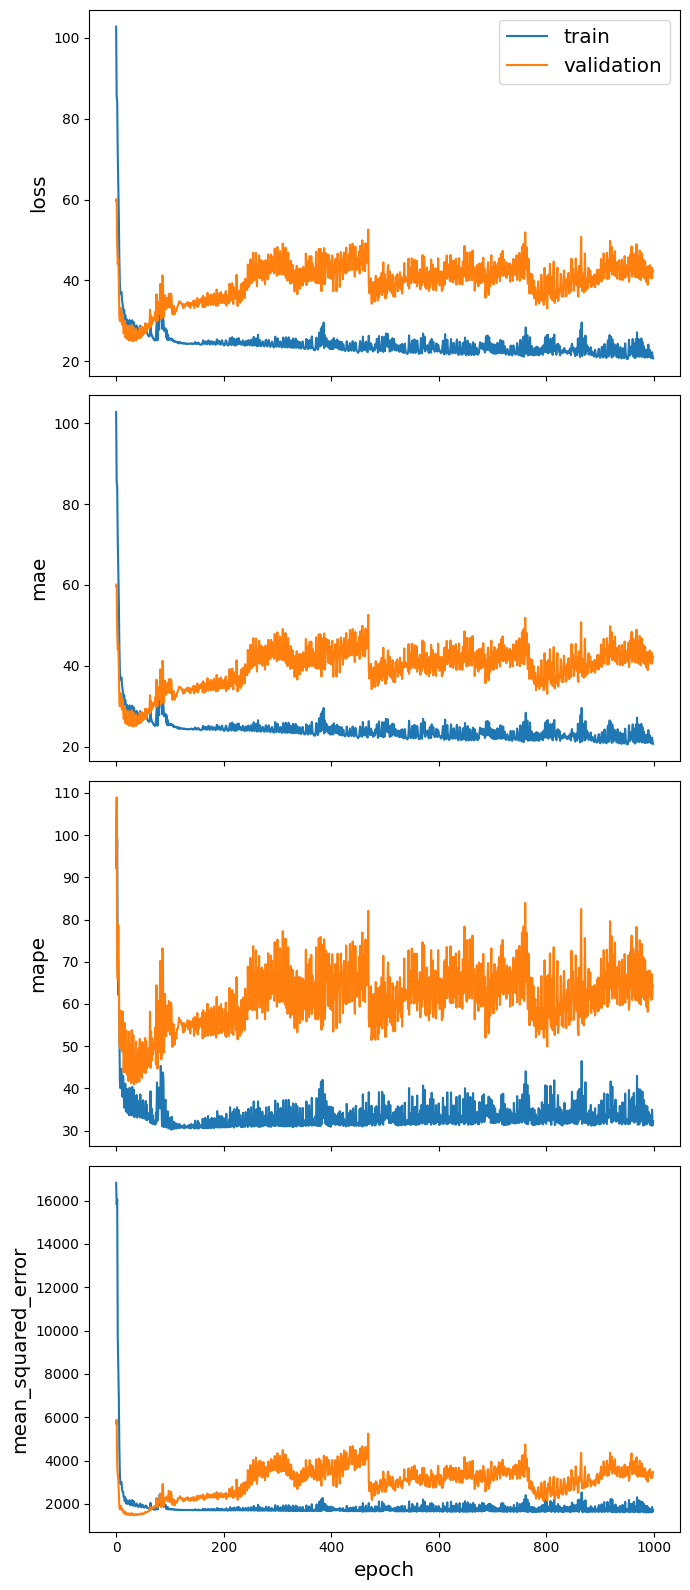

In [48]:
# https://keras.io/api/callbacks/early_stopping/
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(
    monitor = "val_mean_squared_error", 
    patience = patience_to_test, 
    restore_best_weights = True
)

history = model.fit( train_gen_data, epochs = epochs_to_test, validation_data = data_valid, verbose = 2,    
    # shuffling = true means shuffling the whole graph
    shuffle = False, callbacks = [es_callback],
)
sg.utils.plot_history(history)

# [1]

In [49]:
val_subjects, 
test_subjects

Date,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,...,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30
WMT,68.660004,69.059998,69.209999,68.260002,68.709999,68.230003,68.529999,67.970001,67.129997,68.419998,...,120.540001,121.279999,119.860001,120.080002,120.290001,119.029999,119.510002,119.519997,119.589996,119.400002
MSFT,62.580002,62.299999,62.299999,62.840000,62.639999,62.619999,63.189999,62.610001,62.700001,62.529999,...,155.529999,154.690002,154.369995,155.710007,157.410004,157.410004,157.380005,158.669998,158.960007,157.589996
ABC,82.610001,84.660004,83.680000,84.800003,85.480003,84.830002,81.529999,83.860001,84.620003,85.989998,...,85.959999,83.150002,83.550003,83.800003,85.669998,85.599998,85.419998,85.050003,84.910004,83.639999
BAC,22.530001,22.950001,22.680000,22.680000,22.549999,22.940001,23.070000,22.920000,23.010000,22.049999,...,34.700001,35.040001,35.110001,34.950001,34.959999,35.169998,35.220001,35.520000,35.349998,35.150002
T,32.492447,32.303623,32.212990,31.208460,30.815710,30.823263,30.672205,30.974319,30.936556,31.049849,...,29.146526,29.078550,29.259819,29.403322,29.569487,29.509064,29.425982,29.577040,29.637463,29.486404
CAH,74.480003,75.629997,74.500000,75.330002,74.760002,75.220001,73.720001,74.190002,75.000000,75.180000,...,53.700001,51.570000,51.099998,50.610001,51.799999,51.130001,51.290001,51.169998,51.500000,50.770000
GE,190.296036,190.356094,189.275208,189.815643,188.914917,188.374466,188.974960,188.494568,188.314423,187.773972,...,69.758003,69.320847,68.446526,68.946136,68.883682,69.695549,69.882904,70.132706,69.820450,69.195938


In [50]:
test_gen = generator.flow(test_subjects.index, test_targets)
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))
    

1/1 [==============================] - 0s 67ms/step - loss: 19.0490 - mean_squared_error: 1377.4076 - mae: 19.0490 - mape: 26.0903

Test Set Metrics:
	loss: 19.0490
	mean_squared_error: 1377.4076
	mae: 19.0490
	mape: 26.0903


# Show the predicted prices by the Model

At this point, I still need to make sense of what GCN ( and CNN) combination + MLP is predicting. 
I am just displaying the output. 
It appears that price is predicted for each timestamp (day)

In [51]:
all_nodes = node_Data_financial_news.index;
all_gen = generator.flow(all_nodes)
all_predictions = model.predict(all_gen)

all_predictions, all_predictions.shape, node_Data_financial_news.shape

1/1 [==============================] - 0s 215ms/step


(array([[[166.98978 , 172.06071 , 171.74323 , ..., 259.8425  ,
          260.41617 , 253.19183 ],
         [110.69404 , 112.65689 , 110.883194, ..., 124.42529 ,
          124.72233 , 120.79013 ],
         [ 84.199585,  87.47222 ,  87.59867 , ..., 139.5002  ,
          139.88823 , 136.59831 ],
         ...,
         [ 56.981724,  58.242264,  57.23275 , ...,  53.187164,
           53.46798 ,  52.493267],
         [ 80.723625,  83.8195  ,  83.86146 , ..., 132.30128 ,
          132.67143 , 129.50758 ],
         [ 81.69404 ,  83.34729 ,  82.10978 , ...,  77.69227 ,
           78.1106  ,  76.625885]]], dtype=float32),
 (1, 28, 753),
 (28, 753))

In [52]:
df_metrics = pd.DataFrame(columns=['Method', 'Loss', 'MSE', 'MAE', 'MAPE'])

temp = list()
temp.append('GCN-Causation-News');
for name, val in zip(model.metrics_names, test_metrics):    
    temp.append(val)

print(temp)
df_metrics.loc[1] = temp


['GCN-Causation-News', 19.04899024963379, 1377.4075927734375, 19.04899024963379, 26.09033203125]


In [53]:
import math
df_metrics_plot = df_metrics[['Loss', 'MSE', 'MAE', 'MAPE']]
df_metrics_plot['MSE'] = math.sqrt(df_metrics['MSE'])
df_metrics_plot


C:\Users\sayed\AppData\Local\Temp\ipykernel_37632\1108558014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metrics_plot['MSE'] = math.sqrt(df_metrics['MSE'])


,Loss,MSE,MAE,MAPE
1,19.04899,37.113442,19.04899,26.090332


<Axes: >

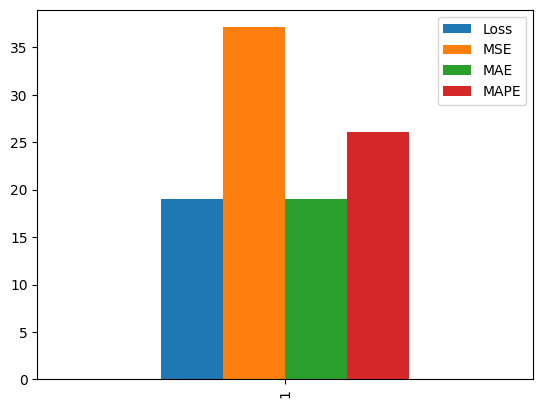

In [54]:
df_metrics_plot.plot( kind = 'bar')